<a href="https://colab.research.google.com/github/khanjamal59/Linear_regression_model_example/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

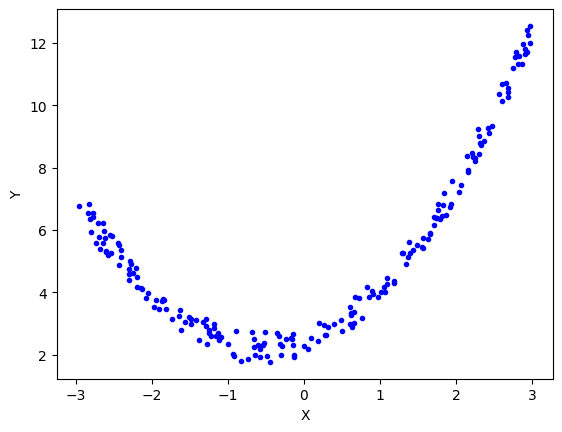

In [28]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.rand(200,1)
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.3162819248855513

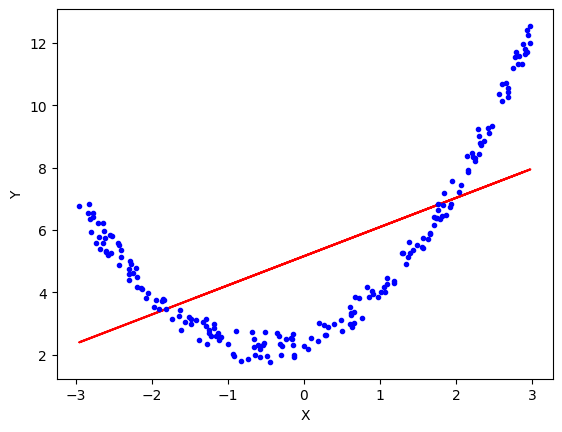

In [34]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [37]:
poly=PolynomialFeatures(degree=2,include_bias=True)
#include_bias=false will only take two columns x^1 and x^2
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [38]:
print(x_train[0])
print(x_train_trans[0])

[2.86964597]
[1.         2.86964597 8.234868  ]


In [39]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [42]:
y_pred=lr.predict(x_test_trans)

In [43]:
r2_score(y_test,y_pred)

0.9901107956933121

In [45]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86994798 0.808658  ]]
[2.44261724]


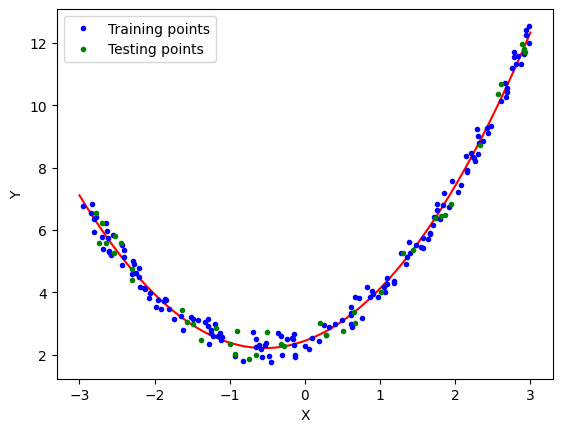

In [48]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_trans=poly.transform(x_new)
y_new=lr.predict(x_new_trans)
plt.plot(x_new,y_new,color='r')
plt.plot(x_train,y_train,"b.",label='Training points')
plt.plot(x_test,y_test,"g.",label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()